In [ ]:
print("hello")


 We will start by performing text classification and text generation using pretrained models like DistilBERT and GPT-2 without using the pipeline() function, understanding the steps involved in loading models, tokenizing input, performing inference, and processing outputs.


  Then, we will discover the simplicity and efficiency of using the pipeline() function to accomplish the same tasks with minimal code. By comparing both approaches, you will appreciate how the pipeline() function streamlines the process, making it easier and faster to implement NLP solutions

## Objectives

- Learn to set up and use the Hugging Face `transformers` library.
- Perform text classification and text generation using DistilBERT and GPT-2 models without `pipeline()`.
- Understand and utilize the `pipeline()` function to simplify various NLP tasks.
- Compare the ease of using models directly versus using the `pipeline()` function.

*   [`torch`](https://pytorch.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for deep learning and neural network modeling.
*   [`transformers`](https://huggingface.co/transformers/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for accessing pretrained models and performing various NLP tasks with ease.  Importing from Hugging Face’s Transformers library.


In [ ]:
from transformers import pipeline
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Text classification with DistilBERT


## Load the model and tokenizer

First, let's initialize a tokenizer and a model for sentiment analysis using DistilBERT fine-tuned on the SST-2 dataset. This setup is useful for tasks where you need to quickly classify the sentiment of a piece of text with a pretrained, efficient transformer model.

### DistilBertTokenizer:

A tokenizer from Hugging Face’s Transformers library specifically for the DistilBERT model.
Tokenization is the process of converting text into smaller units called tokens, which can then be processed by the model.
.from_pretrained():

This method loads a pre-trained tokenizer from Hugging Face’s Model Hub.
It downloads the tokenizer configuration already trained on a specific dataset.
"distilbert-base-uncased-finetuned-sst-2-english":

Refers to a specific pre-trained DistilBERT model fine-tuned on the SST-2 dataset (Stanford Sentiment Treebank).
base: A smaller version of the full BERT model.
uncased: All text is converted to lowercase (e.g., "Apple" and "apple" are treated the same).
sst-2: Dataset focused on binary sentiment classification (positive/negative).


### DistilBertForSequenceClassification:

A DistilBERT model architecture specialized for sequence classification tasks (e.g., sentiment analysis).
It includes the DistilBERT base model plus an additional classification head on top (like a fully connected layer for predictions).
.from_pretrained():

Loads a pre-trained DistilBERT model along with the pre-trained classification head.
Hugging Face downloads the model weights, configuration, and necessary files automatically.
"distilbert-base-uncased-finetuned-sst-2-english":

This is the exact same pre-trained model as the tokenizer, ensuring that both the tokenizer and model are compatible.

### Model
BERT-base = 12 layers, full encoder, larger model.
DistilBERT = 6 layers, compressed encoder, smaller model but nearly as accurate.

Summary of Each Layer’s Components:

 - Multi-Head Self-Attention: Query, Key, Value.
 - Feed-Forward Network.
 - Residual Connections and Layer Normalization.

In [ ]:
# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

### Let us try to use tokenizer

In [ ]:
# Sample text
text = "This is really an amazing movie"

# Tokenize the input text
inputs = tokenizer(text, return_tensors="pt")

print(inputs)

## What do these mean?

###input_ids:

These are the token IDs representing each word (or subword) in the input text.
Every word is mapped to a unique number from the tokenizer’s vocabulary.

In our example:
 - [101] → [CLS] token (start of every sentence in BERT/DistilBERT).
 - 2023 → "This"
 - 2003 → "is"
 - 2428 → "really"
 - 2019 → "an"
 - 6429 → "amazing"
 - 3185 → "movie"
 - [102] → [SEP] token (end of the sentence).

(These numbers come from the DistilBERT vocabulary.)

### attention_mask:

 - Indicates which tokens are real tokens and which are padding.
 - All tokens here are 1, meaning:
 - Every token in your input is meaningful (no padding).
 - If you had padding tokens, they would be marked as 0 to let the model ignore them.

### Why do we need this?

Neural networks don’t understand text directly, so we convert it to numbers.
input_ids are the main input for the model.


###  Perform inference

The `torch.no_grad()` context manager is used to disable gradient calculation.
This reduces memory consumption and speeds up computation, as gradients are not needed for inference (i.e. when you are not training the model). The **inputs syntax is used to unpack a dictionary of keyword arguments in Python. In the context of the model(**inputs):

The **inputs is Python syntax that unpacks the dictionary and passes the input_ids and attention_mask as arguments to the model.

outputs will be an object containing the model's predictions/logits.
For a sequence classification task like sentiment analysis, outputs contains the logits for each class (e.g., positive or negative).


In [ ]:
# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

#### Get the logits

The logits are the raw, unnormalized predictions of the model. Let's extract the logits from the model's outputs to perform further processing, such as determining the predicted class or calculating probabilities.


In [ ]:
logits = outputs.logits
logits.shape ## unnormalized 1 x 2 because it has 2 classes

## Post-process the output
Convert the logits to probabilities and get the predicted class:


In [ ]:
# Convert logits to probabilities
probs = torch.softmax(logits, dim=-1)

# Get the predicted class
predicted_class = torch.argmax(probs, dim=-1)

# Map the predicted class to the label
labels = ["NEGATIVE", "POSITIVE"]
predicted_label = labels[predicted_class]

print(f"Predicted label: {predicted_label}")

# Text generation with GPT-2

## Load tokenizer
 Load the pretrained GPT-2 tokenizer. The tokenizer is responsible for converting text into tokens that the model can understand.

## What’s Different from BERT/DistilBERT?

 - GPT-2 is a Decoder-based Transformer, while BERT is an Encoder-based Transformer.
 - GPT-2 is autoregressive, meaning it generates text token by token, always predicting the next token based on the previous tokens.
 - BERT is bidirectional, meaning it looks at both directions of the text simultaneously, while GPT-2 only looks backward when generating text.

## Why Use GPT-2?
 - Perfect for text generation tasks, such as:
 - Auto-completing sentences,
 - Generating creative stories,
 - Chatbots, etc.
 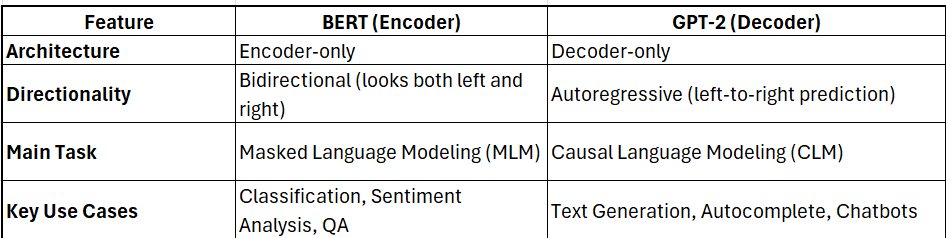


## Key Components of GPT-2’s Decoder:

 - Masked Multi-Head Self-Attention:
  - Each token can only attend to previous tokens (not future ones).
  - Ensures that when generating text, the model doesn’t “cheat” by looking ahead.

 - Add & Norm:
  - Residual connections and layer normalization after each attention block.

 - Feed-Forward Neural Network (FFN):
  - Two linear layers with an activation function in between, applied to each token.

 - Final Linear Layer + Softmax:
  - Outputs probabilities over the vocabulary for the next token.

 - Why Decoder Architecture Matters:
  - GPT-2 is optimized for generative tasks, where the goal is to produce coherent text sequences.

For tasks like:
 - Text generation → GPT-2 is ideal.
 - Sentiment analysis or classification → BERT (Encoder) is more suitable.

In [ ]:
# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

In [ ]:
# Load the tokenizer and model

model = GPT2LMHeadModel.from_pretrained("gpt2")

In [ ]:
# Prompt
prompt = " focus on managing anxiety and promoting preventive measures for vitamin d defiency"

# Tokenize the input text
inputs = tokenizer(prompt, return_tensors="pt")
inputs

## Perform inference  
Generate text using the model

```inputs:``` Input token IDs from the tokenizer

```attention_mask:``` Mask indicating which tokens to attend to

```pad_token_id:```Padding token ID set to the end-of-sequence token ID

```max_length:``` Maximum length of the generated sequences

```num_return_sequence:``` Number of sequences to generate

Key Difference:

Attention Mask (in Hugging Face code): Hides padding tokens. Ensures padded tokens don’t affect model predictions.

Masked Self-Attention (in Transformer architecture): Hides future tokens.
Ensures the model generates text in a left-to-right manner, without "peeking" at future words.

In [ ]:
# Generate text
output_ids = model.generate(
    inputs.input_ids,
    attention_mask=inputs.attention_mask,
    pad_token_id=tokenizer.eos_token_id,
    max_length=50,
    num_return_sequences=1
)

output_ids

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)

outputs


In [ ]:
# Decode the generated text
generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(generated_text)

# Hugging Face `pipeline()` function

The `pipeline()` function from the Hugging Face `transformers` library is a high-level API designed to simplify the usage of pretrained models for various natural language processing (NLP) tasks. It abstracts the complexities of model loading, tokenization, inference, and post-processing, allowing users to perform complex NLP tasks with just a few lines of code.

## Definition

```python
transformers.pipeline(
    task: str,
    model: Optional = None,
    config: Optional = None,
    tokenizer: Optional = None,
    feature_extractor: Optional = None,
    framework: Optional = None,
    revision: str = 'main',
    use_fast: bool = True,
    model_kwargs: Dict[str, Any] = None,
    **kwargs
)
```

## Parameters

- **task**: `str`
  - The task to perform, such as "text-classification", "text-generation", "question-answering", etc.
  - Example: `"text-classification"`

- **model**: `Optional`
  - The model to use. This can be a string (model identifier from Hugging Face model hub), a path to a directory containing model files, or a pre-loaded model instance.
  - Example: `"distilbert-base-uncased-finetuned-sst-2-english"`

- **config**: `Optional`
  - The configuration to use. This can be a string, a path to a directory, or a pre-loaded config object.
  - Example: `{"output_attentions": True}`

- **tokenizer**: `Optional`
  - The tokenizer to use. This can be a string, a path to a directory, or a pre-loaded tokenizer instance.
  - Example: `"bert-base-uncased"`

- **feature_extractor**: `Optional`
  - The feature extractor to use for tasks that require it (e.g., image processing).
  - Example: `"facebook/detectron2"`

- **framework**: `Optional`
  - The framework to use, either `"pt"` for PyTorch or `"tf"` for TensorFlow. If not specified, it will be inferred.
  - Example: `"pt"`

- **revision**: `str`, default `'main'`
  - The specific model version to use (branch, tag, or commit hash).
  - Example: `"v1.0"`

- **use_fast**: `bool`, default `True`
  - Whether to use the fast version of the tokenizer if available.
  - Example: `True`

- **model_kwargs**: `Dict[str, Any]`, default `None`
  - Additional keyword arguments passed to the model during initialization.
  - Example: `{"output_hidden_states": True}`

- **kwargs**: `Any`
  - Additional keyword arguments passed to the pipeline components.

## Task types

The `pipeline()` function supports a wide range of NLP tasks. Here are some of the common tasks:

1. **Text Classification**: `text-classification`
   - **Purpose**: Classify text into predefined categories.
   - **Use Cases**: Sentiment analysis, spam detection, topic classification.

2. **Text Generation**: `text-generation`
   - **Purpose**: Generate coherent text based on a given prompt.
   - **Use Cases**: Creative writing, dialogue generation, story completion.

3. **Question Answering**: `question-answering`
   - **Purpose**: Answer questions based on a given context.
   - **Use Cases**: Building Q&A systems, information retrieval from documents.

4. **Named Entity Recognition (NER)**: `ner` (or `token-classification`)
   - **Purpose**: Identify and classify named entities (like people, organizations, locations) in text.
   - **Use Cases**: Extracting structured information from unstructured text.

5. **Summarization**: `summarization`
   - **Purpose**: Summarize long pieces of text into shorter, coherent summaries.
   - **Use Cases**: Document summarization, news summarization.

6. **Translation**: `translation_xx_to_yy` (e.g., `translation_en_to_fr`)
   - **Purpose**: Translate text from one language to another.
   - **Use Cases**: Language translation, multilingual applications.

7. **Fill-Mask**: `fill-mask`
   - **Purpose**: Predict masked words in a sentence (useful for masked language modeling).
   - **Use Cases**: Language modeling tasks, understanding model predictions.

8. **Zero-Shot Classification**: `zero-shot-classification`
   - **Purpose**: Classify text into categories without needing training data for those categories.
   - **Use Cases**: Flexible and adaptable classification tasks.

9. **Feature Extraction**: `feature-extraction`
   - **Purpose**: Extract hidden state features from text.
   - **Use Cases**: Downstream tasks requiring text representations, such as clustering, similarity, or further custom model training.


### Text Classification

We initialize the pipeline for the text-classification task, specifying the model "distilbert-base-uncased-finetuned-sst-2-english". This model is fine-tuned for sentiment analysis.

In [ ]:
# Load a general text classification model
classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

# Classify a sample text
result = classifier("Bad Taste")
print(result)

### Language Detection

the model "papluca/xlm-roberta-base-language-detection". This model is fine-tuned for language detection.

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification", model="papluca/xlm-roberta-base-language-detection")
result = classifier("Bonjour, comment ça va?")
print(result)

In [ ]:
# Initialize the text generation pipeline with GPT-2
generator = pipeline("text-generation", model="gpt2")

In [ ]:
# Generate text based on a given prompt
prompt = "Once upon a time "
result = generator(prompt, max_length=50, num_return_sequences=1, truncation=True)

# Print the generated text
print(result[0]['generated_text'])

### Text generation using T5 with `pipeline()`

In this example, we will use the `pipeline()` function to perform text-to-text generation with the T5 model. You will load a pretrained T5 model and use it to translate a sentence from English to French based on a given prompt.

#### Initialize the text generation model:
We initialize the pipeline for the `text2text-generation task, specifying the model "t5-small". T5 is a versatile model that can perform various text-to-text generation tasks, including translation.


In [ ]:
# Initialize the text generation pipeline with T5
generator = pipeline("text2text-generation", model="t5-small")

#### Generate text based on a given prompt:
We use the generator to translate a sentence from English to French based on the prompt: "translate English to French: How are you?". Let's specify `max_length=50` to limit the generated text to 50 tokens and `num_return_sequences=1` to generate one sequence. The `generator` function returns the translated text, which is then printed.


In [ ]:
# Generate text based on a given prompt
prompt = "translate English to spanish: Hello?"
result = generator(prompt, max_length=50, num_return_sequences=1)

# Print the generated text
print(result[0]['generated_text'])

## Benefits of using `pipeline()`

- **Reduced Boilerplate Code**: Simplifies the code required to perform NLP tasks.
- **Improved Readability**: Makes code more readable and expressive.
- **Time Efficiency**: Saves time by handling model loading, tokenization, inference, and post-processing automatically.
- **Consistent API**: Provides a consistent API across different tasks, allowing for easy experimentation and quick prototyping.
- **Automatic Framework Handling**: Automatically handles the underlying framework (TensorFlow or PyTorch).

## When to use `pipeline()`

- **Quick Prototyping**: When you need to quickly prototype an NLP application or experiment with different models.
- **Simple Tasks**: When performing simple or common NLP tasks that are well-supported by the `pipeline()` function.
- **Deployment**: When deploying NLP models in environments where simplicity and ease of use are crucial.

## When to avoid `pipeline()`

- **Custom Tasks**: When you need to perform highly customized tasks that are not well-supported by the `pipeline()` function.
- **Performance Optimization**: When you need fine-grained control over the model and tokenization process for performance optimization or specific use cases.


In [ ]:
# Initialize the fill-mask pipeline with BERT
fill_mask = pipeline("fill-mask", model="bert-base-uncased")

# Generate text by filling in the masked token
prompt = "The capital of France is [MASK]."
result = fill_mask(prompt)

# Print the generated text
print(result)

In [ ]:
# Initialize the fill-mask pipeline with BERT
fill_mask = pipeline("fill-mask", model="bert-base-uncased")

# Generate text by filling in the masked token
prompt = "Prevelence of VITAMIN D is common in the country named [MASK]."
result = fill_mask(prompt)

# Print the generated text
print(result)